<a href="https://colab.research.google.com/github/Musabbirstar/Skill-Morph/blob/main/Skill_Morph6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [437]:
import kagglehub
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [438]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [439]:
file_path = path + '/data.csv'
df = pd.read_csv(file_path)
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [440]:
df1 = df[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']] #6
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,842302,M,17.99,10.38,122.80,1001.0
1,842517,M,20.57,17.77,132.90,1326.0
2,84300903,M,19.69,21.25,130.00,1203.0
3,84348301,M,11.42,20.38,77.58,386.1
4,84358402,M,20.29,14.34,135.10,1297.0


In [441]:
df2 = df[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean']] #8
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280


In [442]:
df3 = df[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean']] #10
df3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


In [443]:
df4 = df[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean',
          'symmetry_mean', 'fractal_dimension_mean']] #12
df4.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [444]:
df5 = df[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean',
          'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se']] #14
df5.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813


# **Test-1**

In [445]:
df1['diagnosis'] = df1['diagnosis'].map({'M': 1, 'B': 0})
important_features1 = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
]

/tmp/ipython-input-941468024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['diagnosis'] = df1['diagnosis'].map({'M': 1, 'B': 0})


In [446]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,842302,1,17.99,10.38,122.80,1001.0
1,842517,1,20.57,17.77,132.90,1326.0
2,84300903,1,19.69,21.25,130.00,1203.0
3,84348301,1,11.42,20.38,77.58,386.1
4,84358402,1,20.29,14.34,135.10,1297.0


In [447]:
X = df1[important_features1]
y = df1['diagnosis']

In [448]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)

In [449]:
Shuvo = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

In [450]:
Shuvo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [451]:
predictions = Shuvo.predict(X_test)
prediction_probabilities = Shuvo.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, predictions)

In [452]:
print("Predictions:", predictions)
print("Prediction Probabilities:", prediction_probabilities)
print("Accuracy:", accuracy)

Predictions: [0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0]
Prediction Probabilities: [0.20588235 0.9        1.         0.20588235 0.63636364 1.
 1.         0.20588235 0.02955665 0.9        0.9        0.02955665
 0.02955665 0.9        0.02955665 0.02955665 0.02955665 1.
 1.         0.02955665 0.20588235 0.02955665 0.22222222 0.63636364
 1.         1.         0.20588235 0.0952381  0.63636364 0.02955665
 0.63636364 0.20588235 1.         0.02955665 1.         1.
 1.         0.02955665 1.         0.02955665 0.9        0.02955665
 0.02955665 0.02955665 0.9        0.02955665 0.63636364 0.02955665
 0.02955665 0.9        0.20588235 0.02955665 0.9        0.02955665
 0.20588235 0.02955665 0.02955665 0.02955665 0.63636364 0.20588235
 0.02955665 0.63636364 0.02955665 0.02955665 0.02955665 0.02955665
 0.9        0.0

In [453]:
X_test_subset = X_test.head(10)
y_test_subset = y_test.head(10)

predictions_subset = Shuvo.predict(X_test_subset)

predicted_labels = ['malignant' if p == 1 else 'benign' for p in predictions_subset]

accuracy_subset = accuracy_score(y_test_subset, predictions_subset)

print("Predictions for the first 10 instances:", predicted_labels)
print("Accuracy for the first 10 instances:", accuracy_subset)

Predictions for the first 10 instances: ['benign', 'malignant', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'malignant']
Accuracy for the first 10 instances: 1.0


**Confusion Matrix**

Confusion Matrix (Mistake Analysis):
[[59  7]
 [ 5 43]]

📖 How to read Confusion Matrix:

                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    59      7   ← 7 False Alarms (told cancer but no cancer)
Real Cancer       5      43   ← 5 Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: 102
❌ Wrong Predictions: 12

⚠️ DANGER: Missing cancer (5 cases) is more dangerous than false alarms (7 cases)



/tmp/ipython-input-3527798439.py:42: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3527798439.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


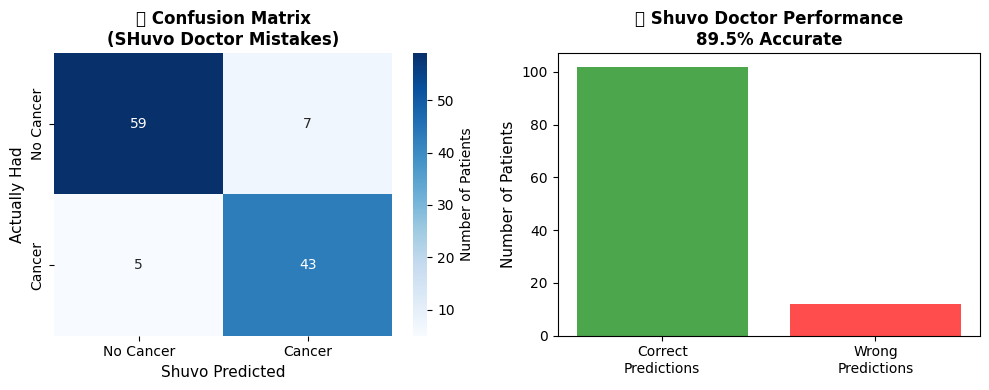

In [454]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\n📖 How to read Confusion Matrix:")
print(f"""
                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    {cm[0,0]}      {cm[0,1]}   ← {cm[0,1]} False Alarms (told cancer but no cancer)
Real Cancer       {cm[1,0]}      {cm[1,1]}   ← {cm[1,0]} Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('🎭 Confusion Matrix\n(SHuvo Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Shuvo Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'📊 Shuvo Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)


plt.tight_layout()
plt.show()

**Detailed Performance**


Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall

ACCURACY : 0.8947 (89.47%)
PRECISION: 0.8600 (86.00%)
RECALL   : 0.8958 (89.58%)
F1-SCORE : 0.8776 (87.76%)
⚠️ Precision needs improvement (too many false alarms)
⚠️ Recall needs improvement (misses some cancers)


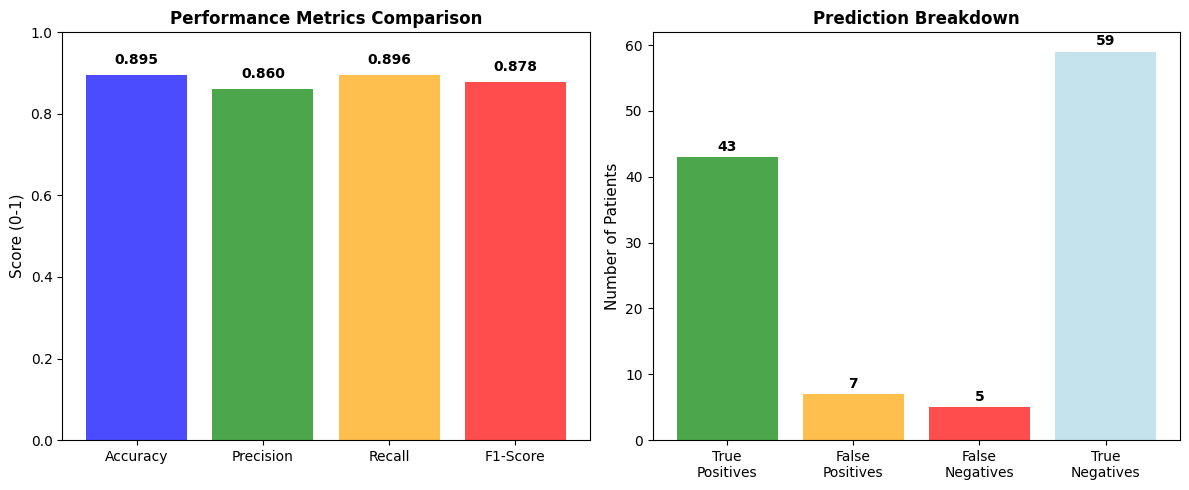

In [455]:
print("""
Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall
""")

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print results
print(f"ACCURACY : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"PRECISION: {precision:.4f} ({precision*100:.2f}%)")
print(f"RECALL   : {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-SCORE : {f1:.4f} ({f1*100:.2f}%)")

# Quick interpretation
if precision > 0.9:
    print("👍 Precision is good (few false alarms)")
else:
    print("⚠️ Precision needs improvement (too many false alarms)")

if recall > 0.9:
    print("👍 Recall is good (catches most cancers)")
else:
    print("⚠️ Recall needs improvement (misses some cancers)")

# Create 2 charts side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Prediction Breakdown (TP/FP/FN/TN)
plt.subplot(1, 2, 2)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

# Add value labels
for bar, count in zip(bars_pr, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**ROC CURVE & AUC - ADVANCED EVALUATION**


ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing

AUC Score: 0.9538 (95.38%)


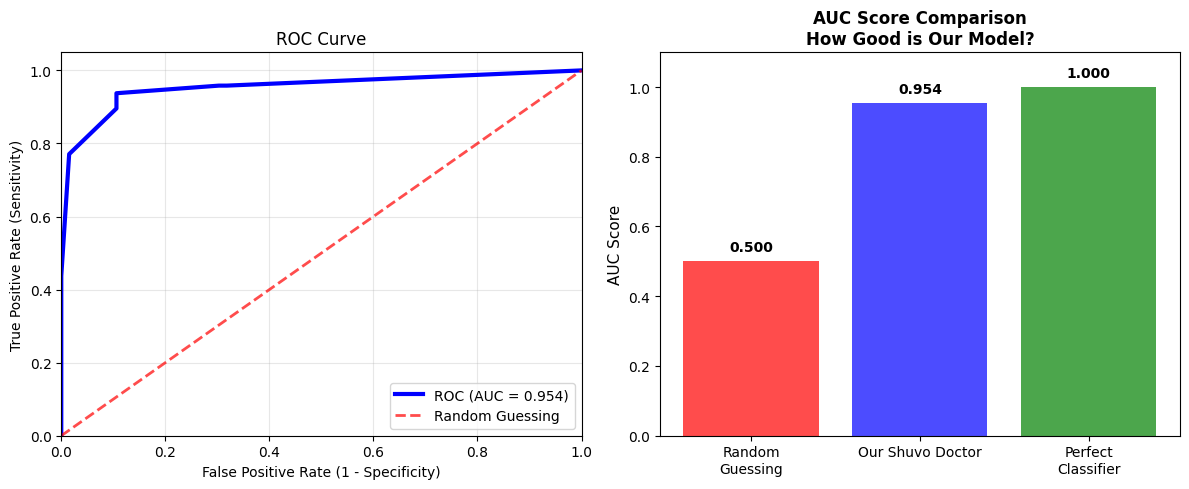

In [456]:
print("""
ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing
""")

# Compute ROC & AUC
fpr, tpr, _ = roc_curve(y_test, prediction_probabilities)
auc_score = roc_auc_score(y_test, prediction_probabilities)

print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create figure with 2 subplots (ROC + AUC Comparison)
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=3, color='blue', label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.7, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Random\nGuessing', 'Our Shuvo Doctor', 'Perfect\nClassifier']
auc_scores = [0.5, auc_score, 1.0]
colors_auc = ['red', 'blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

# Add value labels
for bar, score in zip(bars_auc, auc_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# **Test-2**

In [457]:
df2['diagnosis'] = df2['diagnosis'].map({'M': 1, 'B': 0})
important_features = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
]

/tmp/ipython-input-3829967091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diagnosis'] = df2['diagnosis'].map({'M': 1, 'B': 0})


In [458]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280


In [459]:
X = df2[important_features1]
y = df2['diagnosis']

In [460]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=20
)

In [461]:
Shuvo2 = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

In [462]:
Shuvo2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [463]:
predictions = Shuvo2.predict(X_test2)
prediction_probabilities = Shuvo2.predict_proba(X_test2)[:, 1]
accuracy = accuracy_score(y_test2, predictions)

In [464]:
print("Predictions:", predictions)
print("Prediction Probabilities:", prediction_probabilities)
print("Accuracy:", accuracy)

Predictions: [0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0]
Prediction Probabilities: [0.02941176 0.8        1.         0.02941176 0.         1.
 1.         0.02941176 0.05357143 1.         1.         0.05357143
 0.05357143 1.         0.05357143 0.         0.         1.
 1.         0.         0.02941176 0.         0.         0.65217391
 1.         1.         0.02941176 0.         0.         0.
 0.65217391 0.02941176 1.         0.03389831 1.         1.
 1.         0.03389831 1.         0.         1.         0.
 0.05357143 0.         1.         0.03389831 0.65217391 0.03389831
 0.         0.8        0.02941176 0.05357143 1.         0.
 0.28       0.         0.03389831 0.05357143 0.65217391 0.02941176
 0.         0.65217391 0.         0.03389831 0.03389831 0.05357143
 0.8        0.03389831 0.         0.053

In [465]:
X_test_subset = X_test2.head(10)
y_test_subset = y_test2.head(10)

predictions_subset = Shuvo2.predict(X_test_subset)

predicted_labels = ['malignant' if p == 1 else 'benign' for p in predictions_subset]

accuracy_subset = accuracy_score(y_test_subset, predictions_subset)

print("Predictions for the first 10 instances:", predicted_labels)
print("Accuracy for the first 10 instances:", accuracy_subset)

Predictions for the first 10 instances: ['benign', 'malignant', 'malignant', 'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign', 'malignant']
Accuracy for the first 10 instances: 0.9


**Confusion Matrix**

/tmp/ipython-input-333993104.py:42: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-333993104.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


Confusion Matrix (Mistake Analysis):
[[60  6]
 [ 6 42]]

📖 How to read Confusion Matrix:

                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    60      6   ← 6 False Alarms (told cancer but no cancer)
Real Cancer       6      42   ← 6 Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: 102
❌ Wrong Predictions: 12

⚠️ DANGER: Missing cancer (6 cases) is more dangerous than false alarms (6 cases)



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


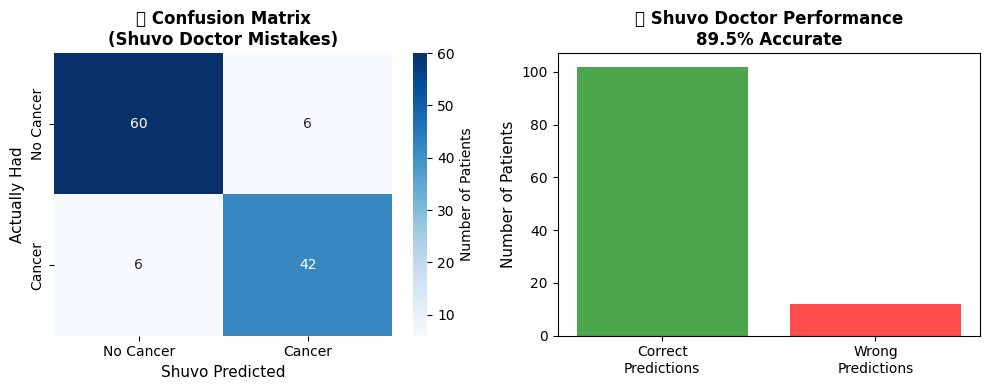

In [466]:
# Calculate confusion matrix
cm = confusion_matrix(y_test2, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\n📖 How to read Confusion Matrix:")
print(f"""
                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    {cm[0,0]}      {cm[0,1]}   ← {cm[0,1]} False Alarms (told cancer but no cancer)
Real Cancer       {cm[1,0]}      {cm[1,1]}   ← {cm[1,0]} Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('🎭 Confusion Matrix\n(Shuvo Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Shuvo Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'📊 Shuvo Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)


plt.tight_layout()
plt.show()

**Detailed Performance**


Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall

ACCURACY : 0.8947 (89.47%)
PRECISION: 0.8750 (87.50%)
RECALL   : 0.8750 (87.50%)
F1-SCORE : 0.8750 (87.50%)
⚠️ Precision needs improvement (too many false alarms)
⚠️ Recall needs improvement (misses some cancers)


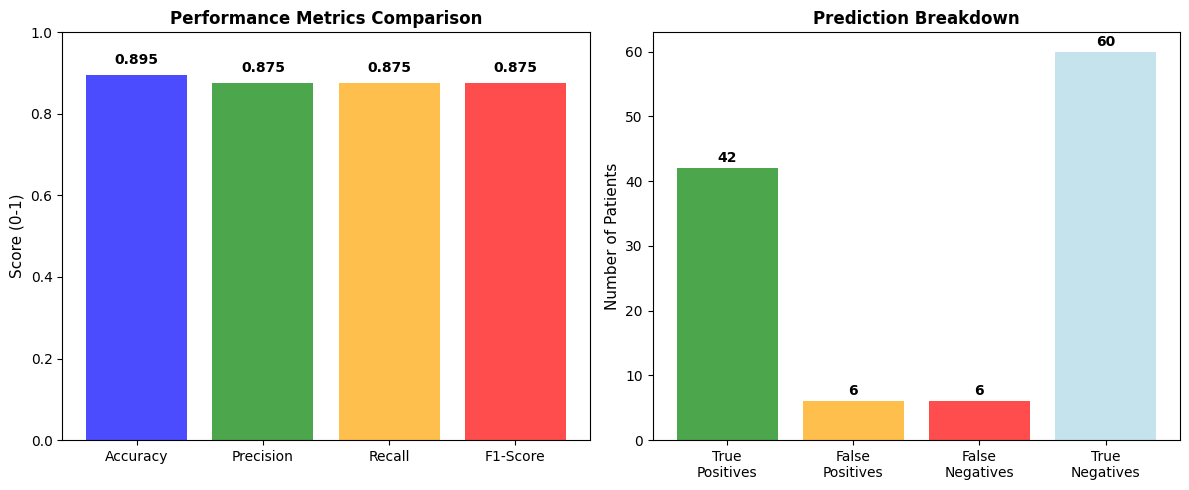

In [467]:
print("""
Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall
""")

# Calculate metrics
accuracy = accuracy_score(y_test2, predictions)
precision = precision_score(y_test2, predictions)
recall = recall_score(y_test2, predictions)
f1 = f1_score(y_test2, predictions)

# Print results
print(f"ACCURACY : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"PRECISION: {precision:.4f} ({precision*100:.2f}%)")
print(f"RECALL   : {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-SCORE : {f1:.4f} ({f1*100:.2f}%)")

# Quick interpretation
if precision > 0.9:
    print("👍 Precision is good (few false alarms)")
else:
    print("⚠️ Precision needs improvement (too many false alarms)")

if recall > 0.9:
    print("👍 Recall is good (catches most cancers)")
else:
    print("⚠️ Recall needs improvement (misses some cancers)")

# Create 2 charts side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Prediction Breakdown (TP/FP/FN/TN)
plt.subplot(1, 2, 2)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

# Add value labels
for bar, count in zip(bars_pr, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


**ROC CURVE & AUC - ADVANCED EVALUATION**


ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing

AUC Score: 0.9208 (92.08%)


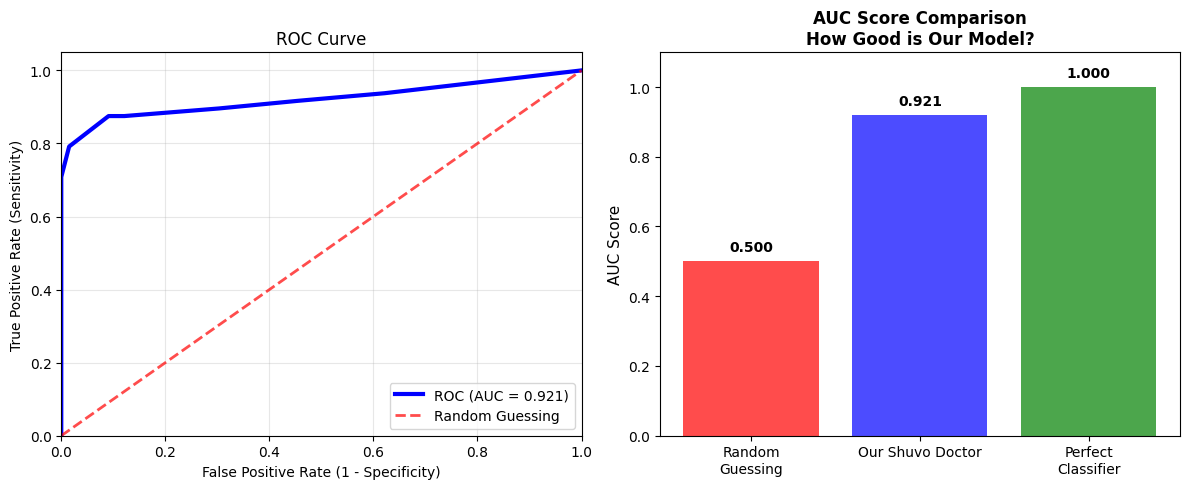

In [468]:
print("""
ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing
""")

# Compute ROC & AUC
fpr, tpr, _ = roc_curve(y_test2, prediction_probabilities)
auc_score = roc_auc_score(y_test2, prediction_probabilities)

print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create figure with 2 subplots (ROC + AUC Comparison)
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=3, color='blue', label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.7, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Random\nGuessing', 'Our Shuvo Doctor', 'Perfect\nClassifier']
auc_scores = [0.5, auc_score, 1.0]
colors_auc = ['red', 'blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

# Add value labels
for bar, score in zip(bars_auc, auc_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# **test-3**

In [469]:
df3['diagnosis'] = df3['diagnosis'].map({'M': 1, 'B': 0})
important_features = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
]

/tmp/ipython-input-2325309673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['diagnosis'] = df3['diagnosis'].map({'M': 1, 'B': 0})


In [470]:
df3.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


In [471]:
X = df3[important_features]
y = df3['diagnosis']

In [472]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.2, random_state=20
)

In [473]:
Shuvo3 = DecisionTreeClassifier(
    max_depth=7,
    random_state=42
)

In [474]:
Shuvo3.fit(X_train3, y_train3)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [475]:
predictions = Shuvo3.predict(X_test3)
prediction_probabilities = Shuvo3.predict_proba(X_test3)[:, 1]
accuracy = accuracy_score(y_test3, predictions)

In [476]:
print("Predictions:", predictions)
print("Prediction Probabilities:", prediction_probabilities)
print("Accuracy:", accuracy)

Predictions: [0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0]
Prediction Probabilities: [0.         0.         1.         0.         1.         1.
 1.         0.09090909 1.         1.         1.         0.
 1.         1.         0.         0.         0.         1.
 1.         0.         0.         0.         1.         1.
 1.         1.         1.         0.         1.         0.
 1.         0.         1.         0.         1.         1.
 1.         0.         1.         0.         1.         0.
 0.         0.         1.         0.         0.         0.
 0.         1.         0.09090909 0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 1.         0.         0.         0.         1.         1.
 1.         0.      

In [477]:
X_test_subset = X_test3.head(10)
y_test_subset = y_test3.head(10)

predictions_subset = Shuvo3.predict(X_test_subset)

predicted_labels = ['malignant' if p == 1 else 'benign' for p in predictions_subset]

accuracy_subset = accuracy_score(y_test_subset, predictions_subset)

print("Predictions for the first 10 instances:", predicted_labels)
print("Accuracy for the first 10 instances:", accuracy_subset)

Predictions for the first 10 instances: ['benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'malignant']
Accuracy for the first 10 instances: 0.8


**Confusion Matrix**

/tmp/ipython-input-1885035768.py:42: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1885035768.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


Confusion Matrix (Mistake Analysis):
[[61  5]
 [ 2 46]]

📖 How to read Confusion Matrix:

                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    61      5   ← 5 False Alarms (told cancer but no cancer)
Real Cancer       2      46   ← 2 Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: 107
❌ Wrong Predictions: 7

⚠️ DANGER: Missing cancer (2 cases) is more dangerous than false alarms (5 cases)



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


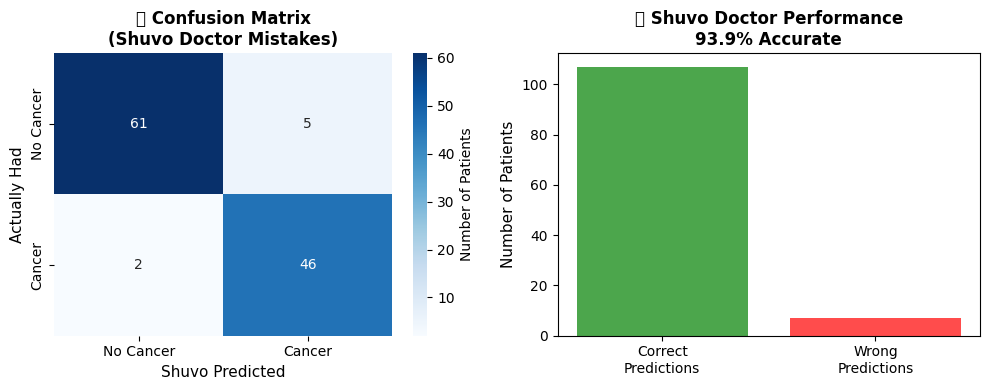

In [478]:
# Calculate confusion matrix
cm = confusion_matrix(y_test3, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\n📖 How to read Confusion Matrix:")
print(f"""
                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    {cm[0,0]}      {cm[0,1]}   ← {cm[0,1]} False Alarms (told cancer but no cancer)
Real Cancer       {cm[1,0]}      {cm[1,1]}   ← {cm[1,0]} Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('🎭 Confusion Matrix\n(Shuvo Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Shuvo Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'📊 Shuvo Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)


plt.tight_layout()
plt.show()

**Detailed Performance**


Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall

ACCURACY : 0.9386 (93.86%)
PRECISION: 0.9020 (90.20%)
RECALL   : 0.9583 (95.83%)
F1-SCORE : 0.9293 (92.93%)
👍 Precision is good (few false alarms)
👍 Recall is good (catches most cancers)


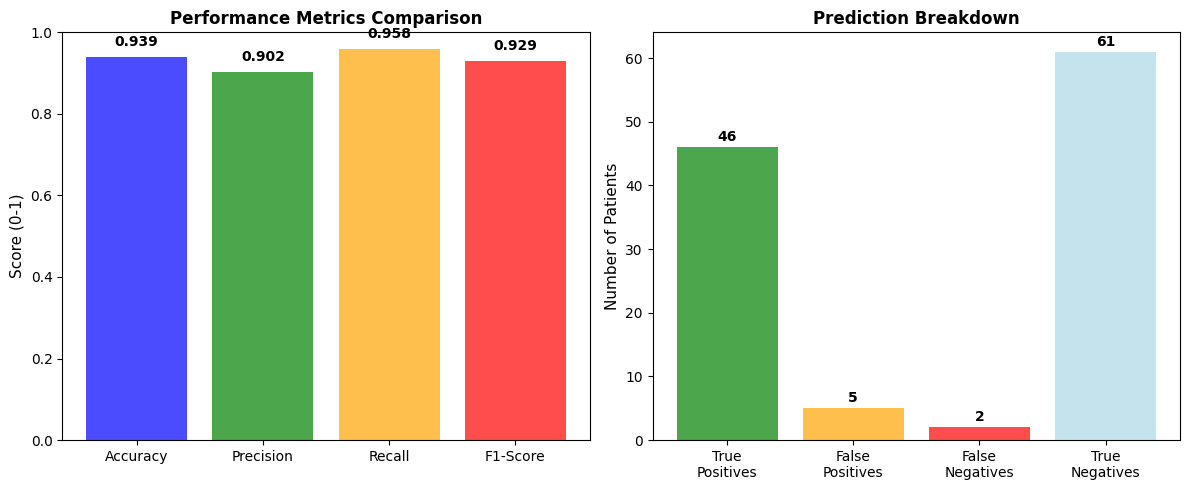

In [479]:
print("""
Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall
""")

# Calculate metrics
accuracy = accuracy_score(y_test3, predictions)
precision = precision_score(y_test3, predictions)
recall = recall_score(y_test3, predictions)
f1 = f1_score(y_test3, predictions)

# Print results
print(f"ACCURACY : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"PRECISION: {precision:.4f} ({precision*100:.2f}%)")
print(f"RECALL   : {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-SCORE : {f1:.4f} ({f1*100:.2f}%)")

# Quick interpretation
if precision > 0.9:
    print("👍 Precision is good (few false alarms)")
else:
    print("⚠️ Precision needs improvement (too many false alarms)")

if recall > 0.9:
    print("👍 Recall is good (catches most cancers)")
else:
    print("⚠️ Recall needs improvement (misses some cancers)")

# Create 2 charts side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Prediction Breakdown (TP/FP/FN/TN)
plt.subplot(1, 2, 2)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

# Add value labels
for bar, count in zip(bars_pr, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


**ROC & AUC**


ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing

AUC Score: 0.9407 (94.07%)


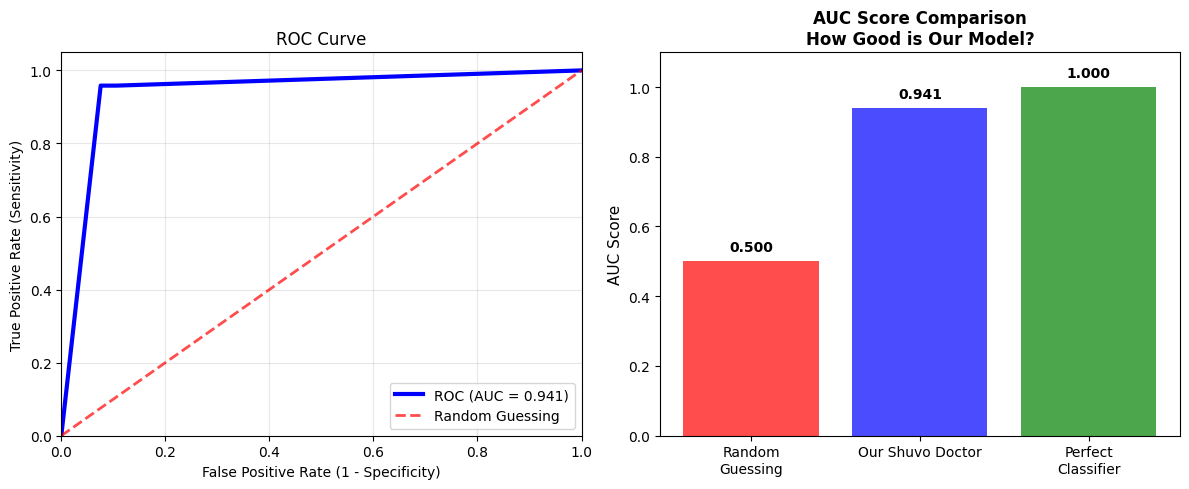

In [480]:
print("""
ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing
""")

# Compute ROC & AUC
fpr, tpr, _ = roc_curve(y_test3, prediction_probabilities)
auc_score = roc_auc_score(y_test3, prediction_probabilities)

print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create figure with 2 subplots (ROC + AUC Comparison)
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=3, color='blue', label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.7, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Random\nGuessing', 'Our Shuvo Doctor', 'Perfect\nClassifier']
auc_scores = [0.5, auc_score, 1.0]
colors_auc = ['red', 'blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

# Add value labels
for bar, score in zip(bars_auc, auc_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# **Test-4**

In [481]:
df4['diagnosis'] = df4['diagnosis'].map({'M': 1, 'B': 0})
important_features = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
]

/tmp/ipython-input-3506319125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['diagnosis'] = df4['diagnosis'].map({'M': 1, 'B': 0})


In [482]:
df4.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [483]:
X = df4[important_features]
y = df4['diagnosis']

In [484]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X, y, test_size=0.2, random_state=20
)

In [485]:
Shuvo4 = DecisionTreeClassifier(
    max_depth=9,
    random_state=42
)

In [486]:
Shuvo4.fit(X_train4, y_train4)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [487]:
predictions = Shuvo4.predict(X_test4)
prediction_probabilities = Shuvo4.predict_proba(X_test4)[:, 1]
accuracy = accuracy_score(y_test4, predictions)

In [488]:
print("Predictions:", predictions)
print("Prediction Probabilities:", prediction_probabilities)
print("Accuracy:", accuracy)

Predictions: [0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0]
Prediction Probabilities: [0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
Accuracy: 0.9298245614035088


In [489]:
X_test_subset = X_test4.head(10)
y_test_subset = y_test4.head(10)

predictions_subset = Shuvo4.predict(X_test_subset)

predicted_labels = ['malignant' if p == 1 else 'benign' for p in predictions_subset]

accuracy_subset = accuracy_score(y_test_subset, predictions_subset)

print("Predictions for the first 10 instances:", predicted_labels)
print("Accuracy for the first 10 instances:", accuracy_subset)

Predictions for the first 10 instances: ['benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'malignant', 'malignant']
Accuracy for the first 10 instances: 0.8


**Confusion Matrix**

/tmp/ipython-input-421813710.py:42: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-421813710.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


Confusion Matrix (Mistake Analysis):
[[61  5]
 [ 3 45]]

📖 How to read Confusion Matrix:

                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    61      5   ← 5 False Alarms (told cancer but no cancer)
Real Cancer       3      45   ← 3 Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: 106
❌ Wrong Predictions: 8

⚠️ DANGER: Missing cancer (3 cases) is more dangerous than false alarms (5 cases)



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


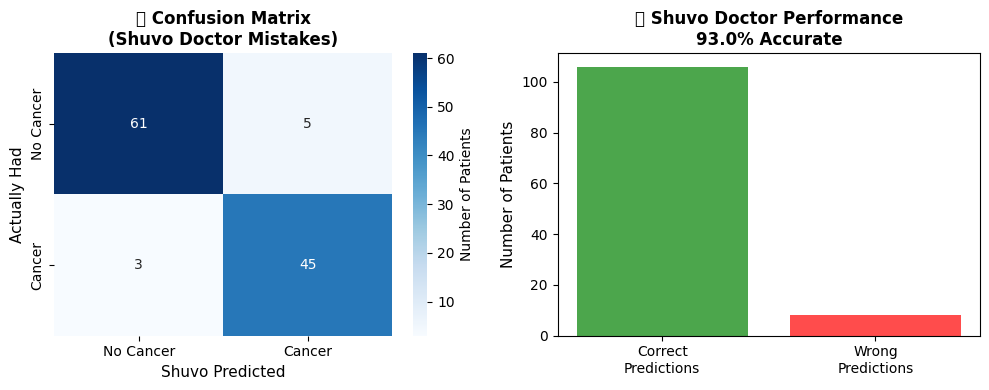

In [490]:
# Calculate confusion matrix
cm = confusion_matrix(y_test4, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\n📖 How to read Confusion Matrix:")
print(f"""
                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    {cm[0,0]}      {cm[0,1]}   ← {cm[0,1]} False Alarms (told cancer but no cancer)
Real Cancer       {cm[1,0]}      {cm[1,1]}   ← {cm[1,0]} Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('🎭 Confusion Matrix\n(Shuvo Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Shuvo Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'📊 Shuvo Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)


plt.tight_layout()
plt.show()

**Detailed Performance**


Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall

ACCURACY : 0.9298 (92.98%)
PRECISION: 0.9000 (90.00%)
RECALL   : 0.9375 (93.75%)
F1-SCORE : 0.9184 (91.84%)
⚠️ Precision needs improvement (too many false alarms)
👍 Recall is good (catches most cancers)


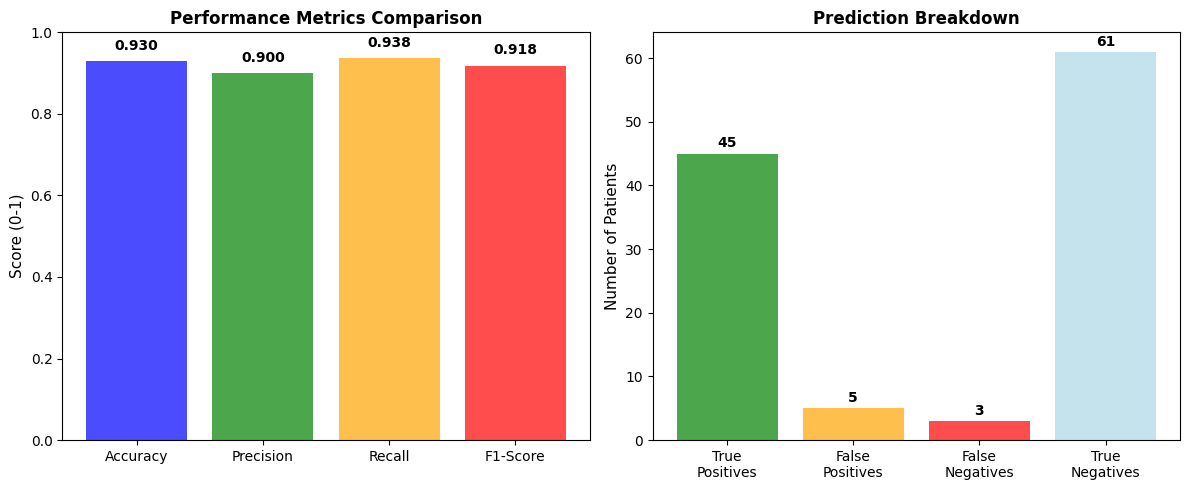

In [491]:
print("""
Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall
""")

# Calculate metrics
accuracy = accuracy_score(y_test4, predictions)
precision = precision_score(y_test4, predictions)
recall = recall_score(y_test4, predictions)
f1 = f1_score(y_test4, predictions)

# Print results
print(f"ACCURACY : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"PRECISION: {precision:.4f} ({precision*100:.2f}%)")
print(f"RECALL   : {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-SCORE : {f1:.4f} ({f1*100:.2f}%)")

# Quick interpretation
if precision > 0.9:
    print("👍 Precision is good (few false alarms)")
else:
    print("⚠️ Precision needs improvement (too many false alarms)")

if recall > 0.9:
    print("👍 Recall is good (catches most cancers)")
else:
    print("⚠️ Recall needs improvement (misses some cancers)")

# Create 2 charts side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Prediction Breakdown (TP/FP/FN/TN)
plt.subplot(1, 2, 2)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

# Add value labels
for bar, count in zip(bars_pr, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


ROC & AUC


ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing

AUC Score: 0.9309 (93.09%)


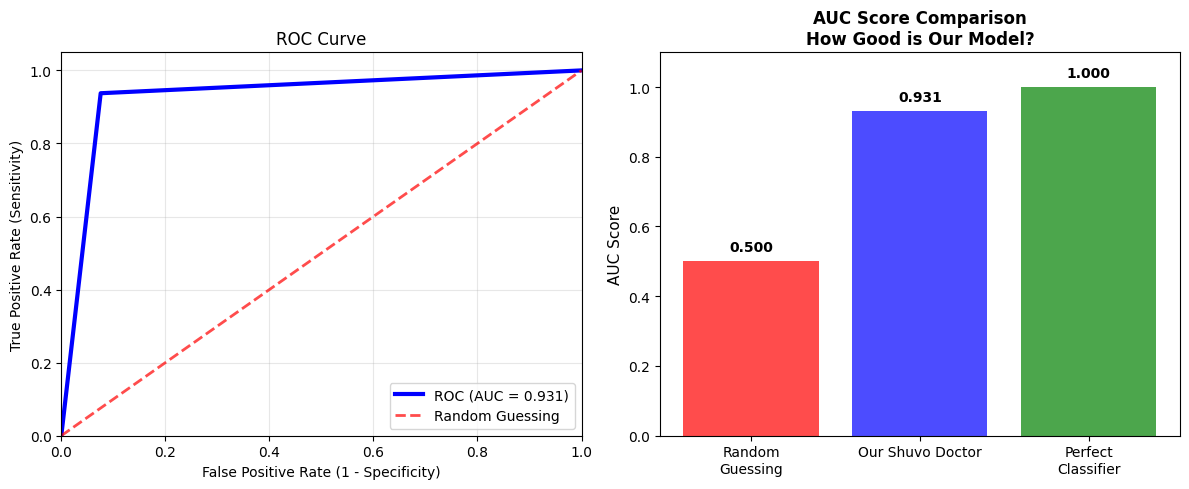

In [492]:
print("""
ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing
""")

# Compute ROC & AUC
fpr, tpr, _ = roc_curve(y_test4, prediction_probabilities)
auc_score = roc_auc_score(y_test4, prediction_probabilities)

print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create figure with 2 subplots (ROC + AUC Comparison)
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=3, color='blue', label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.7, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Random\nGuessing', 'Our Shuvo Doctor', 'Perfect\nClassifier']
auc_scores = [0.5, auc_score, 1.0]
colors_auc = ['red', 'blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

# Add value labels
for bar, score in zip(bars_auc, auc_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# **Test-5**

In [493]:
df5['diagnosis'] = df5['diagnosis'].map({'M': 1, 'B': 0})
important_features = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
    'radius_se',
    'texture_se',
]

/tmp/ipython-input-4259736414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['diagnosis'] = df5['diagnosis'].map({'M': 1, 'B': 0})


In [494]:
df5.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813


In [495]:
X = df5[important_features]
y = df5['diagnosis']

In [496]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X, y, test_size=0.2, random_state=20
)

In [497]:
Shuvo5 = DecisionTreeClassifier(
    max_depth=11,
    random_state=42
)

In [498]:
Shuvo5.fit(X_train5, y_train5)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [499]:
predictions = Shuvo5.predict(X_test5)
prediction_probabilities = Shuvo5.predict_proba(X_test5)[:, 1]
accuracy = accuracy_score(y_test5, predictions)

In [500]:
print("Predictions:", predictions)
print("Prediction Probabilities:", prediction_probabilities)
print("Accuracy:", accuracy)

Predictions: [0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0]
Prediction Probabilities: [0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
Accuracy: 0.8947368421052632


In [501]:
X_test_subset = X_test5.head(10)
y_test_subset = y_test5.head(10)

predictions_subset = Shuvo5.predict(X_test_subset)

predicted_labels = ['malignant' if p == 1 else 'benign' for p in predictions_subset]

accuracy_subset = accuracy_score(y_test_subset, predictions_subset)

print("Predictions for the first 10 instances:", predicted_labels)
print("Accuracy for the first 10 instances:", accuracy_subset)

Predictions for the first 10 instances: ['benign', 'benign', 'malignant', 'benign', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'malignant']
Accuracy for the first 10 instances: 0.9


Confusion Matrix

Confusion Matrix (Mistake Analysis):
[[57  9]
 [ 3 45]]

📖 How to read Confusion Matrix:

                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    57      9   ← 9 False Alarms (told cancer but no cancer)
Real Cancer       3      45   ← 3 Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: 102
❌ Wrong Predictions: 12

⚠️ DANGER: Missing cancer (3 cases) is more dangerous than false alarms (9 cases)



/tmp/ipython-input-1888071033.py:42: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1888071033.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


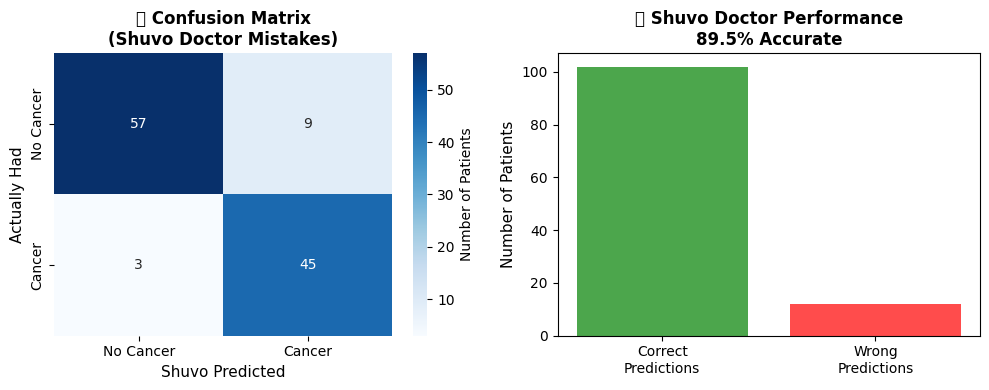

In [502]:
# Calculate confusion matrix
cm = confusion_matrix(y_test5, predictions)
print("Confusion Matrix (Mistake Analysis):")
print(cm)

print("\n📖 How to read Confusion Matrix:")
print(f"""
                 Shuvo Predicted
              No Cancer  Cancer
Real No Cancer    {cm[0,0]}      {cm[0,1]}   ← {cm[0,1]} False Alarms (told cancer but no cancer)
Real Cancer       {cm[1,0]}      {cm[1,1]}   ← {cm[1,0]} Missed Cancer (told no cancer but had cancer) ⚠️

✅ Correct Predictions: {cm[0,0] + cm[1,1]}
❌ Wrong Predictions: {cm[0,1] + cm[1,0]}

⚠️ DANGER: Missing cancer ({cm[1,0]} cases) is more dangerous than false alarms ({cm[0,1]} cases)
""")

# Create beautiful confusion matrix plot
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('🎭 Confusion Matrix\n(Shuvo Doctor Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Shuvo Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'📊 Shuvo Doctor Performance\n{accuracy*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)


plt.tight_layout()
plt.show()

**Detailed Performance**


Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall

ACCURACY : 0.8947 (89.47%)
PRECISION: 0.8333 (83.33%)
RECALL   : 0.9375 (93.75%)
F1-SCORE : 0.8824 (88.24%)
⚠️ Precision needs improvement (too many false alarms)
👍 Recall is good (catches most cancers)


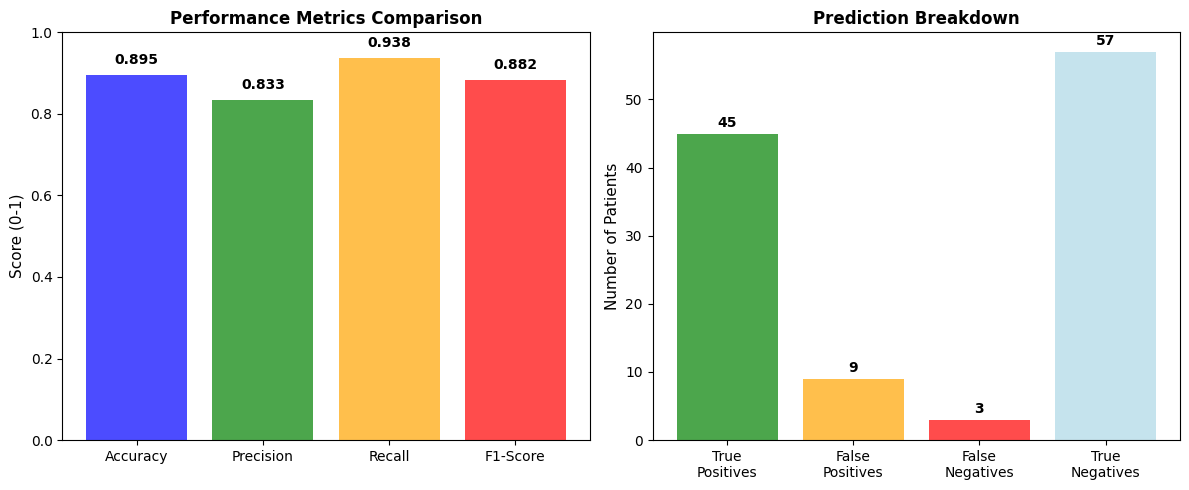

In [503]:
print("""
Think of Shuvo as a doctor checking cancer:
- Accuracy = Overall correctness
- Precision = When it says 'Cancer', how often it's right
- Recall = Of all cancers, how many it catches
- F1-Score = Balance between precision & recall
""")

# Calculate metrics
accuracy = accuracy_score(y_test5, predictions)
precision = precision_score(y_test5, predictions)
recall = recall_score(y_test5, predictions)
f1 = f1_score(y_test5, predictions)

# Print results
print(f"ACCURACY : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"PRECISION: {precision:.4f} ({precision*100:.2f}%)")
print(f"RECALL   : {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-SCORE : {f1:.4f} ({f1*100:.2f}%)")

# Quick interpretation
if precision > 0.9:
    print("👍 Precision is good (few false alarms)")
else:
    print("⚠️ Precision needs improvement (too many false alarms)")

if recall > 0.9:
    print("👍 Recall is good (catches most cancers)")
else:
    print("⚠️ Recall needs improvement (misses some cancers)")

# Create 2 charts side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Metrics comparison
plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Score (0-1)', fontsize=11)

# Add labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Prediction Breakdown (TP/FP/FN/TN)
plt.subplot(1, 2, 2)
categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives', 'True\nNegatives']
tp, fp, fn, tn = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
counts = [tp, fp, fn, tn]
colors_pr = ['green', 'orange', 'red', 'lightblue']
bars_pr = plt.bar(categories, counts, color=colors_pr, alpha=0.7)
plt.title('Prediction Breakdown', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

# Add value labels
for bar, count in zip(bars_pr, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


ROC.................


ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing

AUC Score: 0.9006 (90.06%)


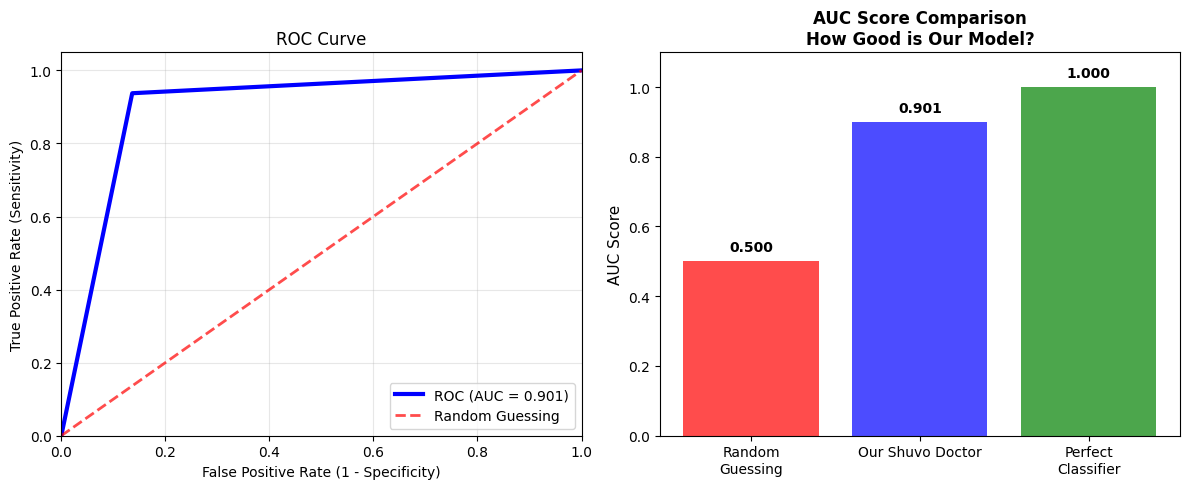

In [504]:
print("""
ROC = Receiver Operating Characteristic
AUC = Area Under the ROC Curve

ROC shows the trade-off between catching cancer (TPR) and false alarms (FPR).
AUC summarizes overall performance:
- 1.00 = Perfect
- 0.90–1.00 = Outstanding
- 0.80–0.90 = Excellent
- 0.70–0.80 = Good
- 0.50 = Random guessing
""")

# Compute ROC & AUC
fpr, tpr, _ = roc_curve(y_test5, prediction_probabilities)
auc_score = roc_auc_score(y_test5, prediction_probabilities)

print(f"AUC Score: {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create figure with 2 subplots (ROC + AUC Comparison)
plt.figure(figsize=(12, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=3, color='blue', label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.7, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Subplot 2: AUC Comparison
plt.subplot(1, 2, 2)
model_names = ['Random\nGuessing', 'Our Shuvo Doctor', 'Perfect\nClassifier']
auc_scores = [0.5, auc_score, 1.0]
colors_auc = ['red', 'blue', 'green']
bars_auc = plt.bar(model_names, auc_scores, color=colors_auc, alpha=0.7)

plt.ylim(0, 1.1)
plt.ylabel('AUC Score', fontsize=11)
plt.title('AUC Score Comparison\nHow Good is Our Model?', fontweight='bold', fontsize=12)

# Add value labels
for bar, score in zip(bars_auc, auc_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# **Final**

In [505]:
# Collect performance metrics from each test
results = {
    'Test': ['Test-1', 'Test-2', 'Test-3', 'Test-4', 'Test-5'],
    'Accuracy': [
        accuracy_score(y_test, Shuvo.predict(X_test)),
        accuracy_score(y_test2, Shuvo2.predict(X_test2)),
        accuracy_score(y_test3, Shuvo3.predict(X_test3)),
        accuracy_score(y_test4, Shuvo4.predict(X_test4)),
        accuracy_score(y_test5, Shuvo5.predict(X_test5))
    ],
    'Precision': [
        precision_score(y_test, Shuvo.predict(X_test)),
        precision_score(y_test2, Shuvo2.predict(X_test2)),
        precision_score(y_test3, Shuvo3.predict(X_test3)),
        precision_score(y_test4, Shuvo4.predict(X_test4)),
        precision_score(y_test5, Shuvo5.predict(X_test5))
    ],
    'Recall': [
        recall_score(y_test, Shuvo.predict(X_test)),
        recall_score(y_test2, Shuvo2.predict(X_test2)),
        recall_score(y_test3, Shuvo3.predict(X_test3)),
        recall_score(y_test4, Shuvo4.predict(X_test4)),
        recall_score(y_test5, Shuvo5.predict(X_test5))
    ],
    'F1-Score': [
        f1_score(y_test, Shuvo.predict(X_test)),
        f1_score(y_test2, Shuvo2.predict(X_test2)),
        f1_score(y_test3, Shuvo3.predict(X_test3)),
        f1_score(y_test4, Shuvo4.predict(X_test4)),
        f1_score(y_test5, Shuvo5.predict(X_test5))
    ]
}

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Display the table
display(results_df)

,Test,Accuracy,Precision,Recall,F1-Score
0,Test-1,0.894737,0.860000,0.895833,0.877551
1,Test-2,0.894737,0.875000,0.875000,0.875000
2,Test-3,0.938596,0.901961,0.958333,0.929293
3,Test-4,0.929825,0.900000,0.937500,0.918367
4,Test-5,0.894737,0.833333,0.937500,0.882353
